<a href="https://colab.research.google.com/github/laduqueo/Senales_y_Sistemas/blob/main/Taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Consultar y realizar los ejercicios propuestos en el cuaderno
Transformada de Fourier.



*   Presente y describa el modelo que utiliza la FFT para el cálculo de los armónicos.

1. Transformada de Fourier (TF)

La Transformada de Fourier extiende la serie de Fourier a señales definidas sobre todo el eje temporal:

$$X(\omega) = \mathcal{F}\{x(t)\} = \int_{-\infty}^{+\infty} x(t) e^{-j\omega t} dt$$

Transformada inversa:

$$x(t) = \mathcal{F}^{-1}\{X(\omega)\} = \frac{1}{2\pi} \int_{-\infty}^{+\infty} X(\omega) e^{j\omega t} d\omega$$

2. Transformada de Fourier en Tiempo Discreto (DTFT)

Para señales en tiempo discreto \( x[k] \), se define la DTFT:

$$X(\omega) = \sum_{k=-\infty}^{+\infty} x[k] e^{-j\omega k}, \quad \omega \in [-\pi, \pi]$$

Transformada inversa:

$$x[k] = \frac{1}{2\pi} \int_{-\pi}^{\pi} X(\omega) e^{j\omega k} d\omega$$

3. Transformada Discreta de Fourier (DFT)

La DFT se aplica a una señal finita de longitud \( K \):

$$X[n] = \sum_{k=0}^{K-1} x[k] \cdot e^{-j \frac{2\pi}{K} nk}, \quad n = 0, 1, ..., K-1$$

Transformada inversa:

$$x[k] = \frac{1}{K} \sum_{n=0}^{K-1} X[n] \cdot e^{j \frac{2\pi}{K} nk}$$

4. Transformada Rápida de Fourier (FFT)

La FFT es un algoritmo eficiente para calcular la DFT, reduciendo la complejidad computacional de \( O(K^2) \) a \( O(K \log K) \).

5. Modelo FFT para análisis armónico


*   Señal discreta \( x[k] \) de longitud \( K \), muestreada a frecuencia \( f_s\).

*   Base teórica: Serie de Fourier \( \rightarrow \) DTFT \( \rightarrow \) DFT.

*   Cálculo: FFT computa los \( X[n] \), que representan los armónicos.
*   Resolución en frecuencia: \( f_n = \frac{n \cdot f_s}{K} \), con \( n = 0, 1, ..., K-1 \).

*   Salida: Magnitudes y fases de los armónicos presentes en la señal.
*   Aplicaciones: Análisis de distorsión armónica, calidad de energía, audio, vibración, etc.

6. Relación con la Serie de Fourier


$$X[n] = K \cdot c_n$$

Donde $c_n$ son los coeficientes de la Serie de Fourier en tiempo discreto.





*   Realice una comparación del tiempo de cómputo requerido para el cálculo de la transformada discreta de Fourier utilizado la estimación por sumatoria vs la FFT. Pruebe distintos valores de longitud de la señal de entrada (4,8,16,32,64,128,256,512,1024,2048,4096). Presente una gráfica comparativa de los tiempos de ejecución en segundos vs la longitud de la señal de entrada.



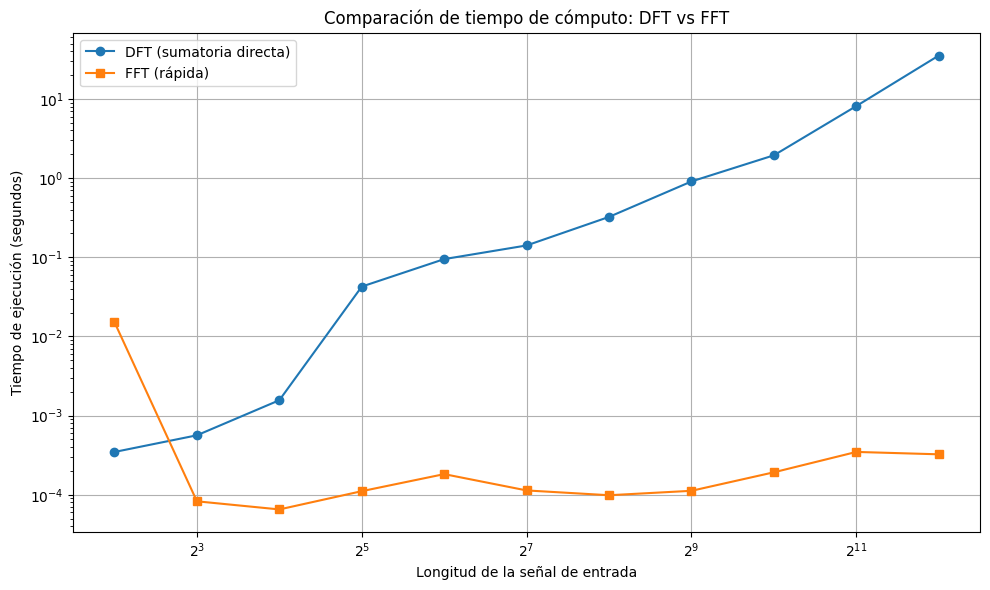

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Lista de longitudes de señal a probar
lengths = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

# Inicializar listas para almacenar los tiempos
dft_times = []
fft_times = []

# Función que calcula la DFT "a mano" (sin usar librerías)
def DFT_manual(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            X[n] += x[k] * np.exp(-2j * np.pi * n * k / N)
    return X

# Bucle principal para medir los tiempos
for N in lengths:
    x = np.random.rand(N)  # Señal aleatoria de longitud N

    # Medir tiempo de DFT manual
    start_time = time.time()
    DFT_manual(x)
    dft_times.append(time.time() - start_time)

    # Medir tiempo de FFT usando NumPy
    start_time = time.time()
    np.fft.fft(x)
    fft_times.append(time.time() - start_time)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(lengths, dft_times, 'o-', label='DFT (sumatoria directa)')
plt.plot(lengths, fft_times, 's-', label='FFT (rápida)')
plt.xlabel("Longitud de la señal de entrada")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Comparación de tiempo de cómputo: DFT vs FFT")
plt.xscale("log", base=2)
plt.yscale("log")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



*   Consulte en qué consiste la frecuencia de -3dB y su relación con las frecuencias de corte en el filtrado espectral de señales.

El decibelio (dB) es una medida logarítmica que compara una magnitud (generalmente potencia o amplitud) respecto a una referencia. En el caso de amplitud (como la magnitud de una señal o respuesta en frecuencia de un filtro), se define como:
$$
\text{dB} = 20 \cdot \log_{10}\left( \frac{A}{A_0} \right)
$$

donde:

$A$ es la amplitud medida (por ejemplo, la ganancia del filtro a cierta frecuencia).

$A_0$ es la amplitud máxima o de referencia.


¿Qué es la frecuencia de -3 dB?
Es la frecuencia en la que la ganancia del sistema cae a 70.7% de su valor máximo.

Esto se debe a que:

$$20 \cdot \log_{10}(0.707) \approx -3\,\text{dB}$$

Entonces, la frecuencia de -3 dB es aquella en la que la señal se ha atenuado en aproximadamente un 30% en magnitud (o un 50% en potencia).



*   Las frecuencias de corte son aquellas donde comienza o termina el paso de señal a través del filtro.

*   Por convención, estas frecuencias de corte se definen donde la ganancia del filtro cae a -3 dB respecto a su valor máximo.






*   Implemente un filtro pasa bajas, un pasa altas, un pasa bandas, y un rechaza bandas utilizando la FFT y la iFFT sobre 5 segundos de su canción favorita de YouTube.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.5.22-py3-none-any.whl size=3012594 sha256=8128a8686656855dc8c81169c9d9978d804e297130462062c3c78645463175ee
  Stored in directory: /tmp/pip-ephem-wheel-cache-ujvre5vy/wheels/2d/79/97/7209650ef73114e0fe0603480da012ad3afacb9cae6b8acd9a
Successfully built yt-dlp
[youtube] Extracting URL: https://www.youtube.com/watch?v=Ic5vxw3eijY
[youtube] Ic5vxw3eijY: Downloading webpage
[youtube] Ic5vxw3eijY: Downloading tv client config
[youtube] Ic5vxw3eijY: Downloading player 612f74a3-main
[youtube] Ic5vxw3eijY: Downloading tv player API JSON
[youtube] Ic5vxw3eijY: Downloading ios player API JSON
[youtube] Ic5vxw3eijY: Downloading m3u8 information
[info] Ic5vxw3eijY: Downloading 1 format(s): 251
[download] Destination: audio
[download] 100% o

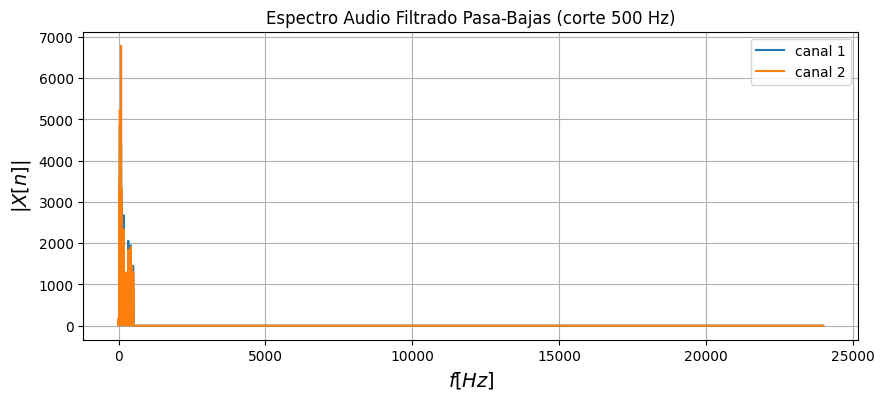

Audio Filtrado Pasa-Bajas:


- Aplicando filtro Pasa-Altas (corte en 2000 Hz)


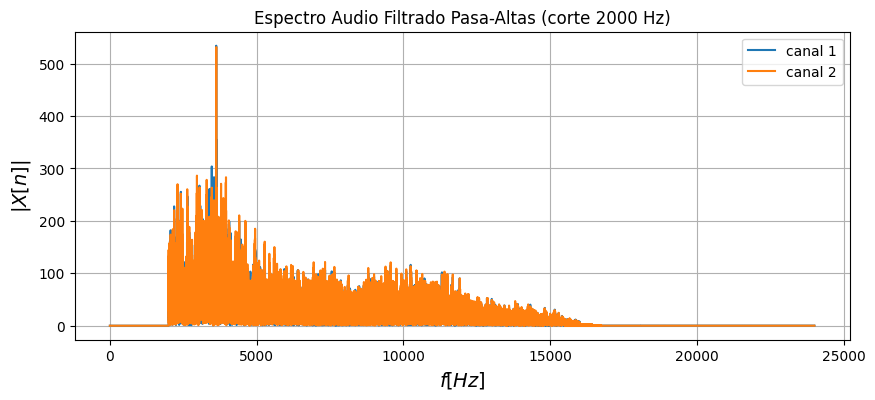

Audio Filtrado Pasa-Altas:


- Aplicando filtro Pasa-Bandas (300-1500 Hz)


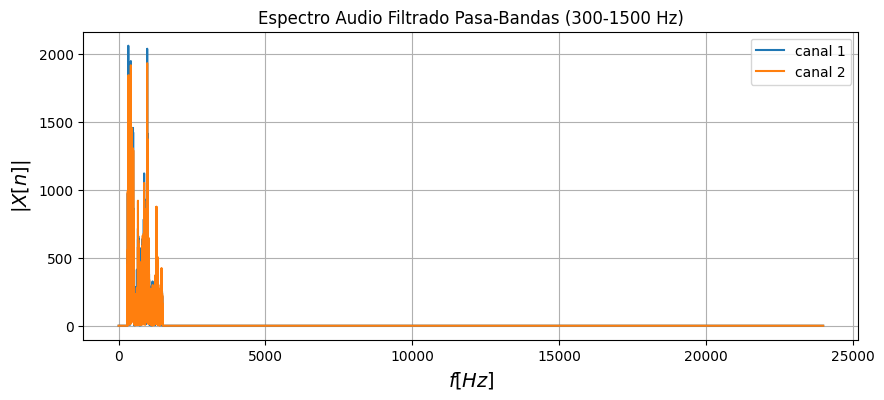

Audio Filtrado Pasa-Bandas:


- Aplicando filtro Rechaza-Bandas (800-1200 Hz)


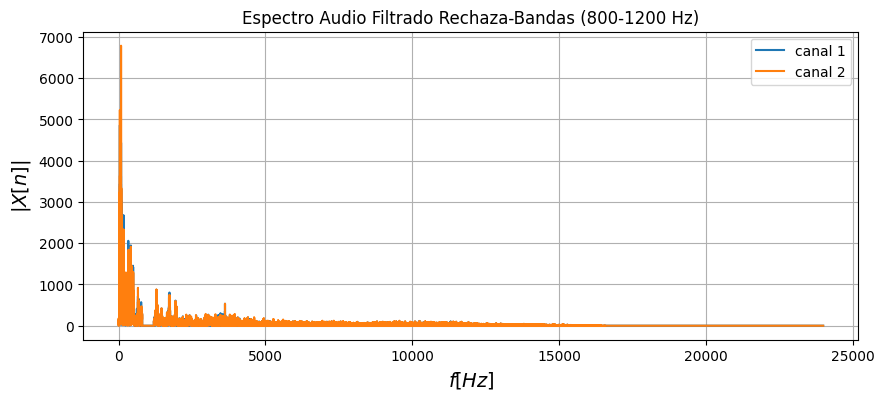

Audio Filtrado Rechaza-Bandas:



Proceso de filtrado completado.


In [5]:
# Para instalar yt-dlp y ffmpeg si aún no están
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
# !apt update && apt install ffmpeg

# Debes incluir el link del video a procesar:
link="https://www.youtube.com/watch?v=Ic5vxw3eijY" # Cambia este link por el de tu canción favorita
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}

# Se convierte el audio a .wav para procesar:
!ffmpeg -y -i audio.mp3 output.wav

# Librería para manipulación de archivos de audio
# !pip install soundfile

import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))
print('Forma del audio:', x.shape)

start_time = 30  # Elegí el segundo donde querés que comience el audio
ns = 5           # Duración del segmento en segundos
start_sample = int(fs * start_time)
end_sample = start_sample + int(fs * ns)
xs = x[start_sample:end_sample, :]

print('Forma del segmento de audio a procesar:', xs.shape)

# Asegurarse de que el segmento no exceda la longitud total del audio
if xs.shape[0] == 0 and x.shape[0] > 0:
    print("Error: El segmento solicitado excede la duración del audio. Procesando la duración completa.")
    xs = x
    end_sample = x.shape[0]
    ns = x.shape[0] / fs
elif xs.shape[0] == 0 and x.shape[0] == 0:
     print("Error: No se pudo cargar el audio.")
     # Puedes salir o manejar el error de otra manera
     exit()

# Cálculo de la FFT del segmento de audio
Xw = np.fft.rfft(xs, axis=0)
vf = np.fft.rfftfreq(xs.shape[0], 1/fs)

# --- Implementación de los filtros ---

# Frecuencias de corte (ajusta estos valores según tu audio y el efecto deseado)
# Estas son frecuencias de ejemplo en Hz
fc_pb = 500      # Frecuencia de corte para filtro pasa-bajas
fc_pa = 2000     # Frecuencia de corte para filtro pasa-altas
f1_pb = 300      # Frecuencia de inicio de banda para pasa-banda
f2_pb = 1500     # Frecuencia de fin de banda para pasa-banda
f1_rb = 800      # Frecuencia de inicio de banda para rechaza-banda
f2_rb = 1200     # Frecuencia de fin de banda para rechaza-banda


print("\nAplicando filtros:")

# 1. Filtro Pasa-Bajas
print("- Aplicando filtro Pasa-Bajas (corte en", fc_pb, "Hz)")
Xw_pb = Xw.copy()
# Creamos una máscara booleana: True para las frecuencias a atenuar, False para pasar
mask_pb = vf > fc_pb
Xw_pb[mask_pb, :] = 0 # Poner a cero las frecuencias por encima de fc_pb
xe_pb = np.fft.irfft(Xw_pb, axis=0)

plt.figure(figsize=(10, 4))
plt.plot(vf, abs(Xw_pb))
plt.title(f'Espectro Audio Filtrado Pasa-Bajas (corte {fc_pb} Hz)')
plt.xlabel(r'$f[Hz]$', fontsize = 14)
plt.ylabel(r'$|X[n]|$', fontsize = 14)
plt.legend(('canal 1','canal 2'))
plt.grid()
plt.show()
print("Audio Filtrado Pasa-Bajas:")
display(Audio(xe_pb.T, rate=fs))


# 2. Filtro Pasa-Altas
print("- Aplicando filtro Pasa-Altas (corte en", fc_pa, "Hz)")
Xw_pa = Xw.copy()
# Creamos una máscara booleana: True para las frecuencias a atenuar (por debajo de fc_pa)
mask_pa = vf < fc_pa
Xw_pa[mask_pa, :] = 0 # Poner a cero las frecuencias por debajo de fc_pa
xe_pa = np.fft.irfft(Xw_pa, axis=0)

plt.figure(figsize=(10, 4))
plt.plot(vf, abs(Xw_pa))
plt.title(f'Espectro Audio Filtrado Pasa-Altas (corte {fc_pa} Hz)')
plt.xlabel(r'$f[Hz]$', fontsize = 14)
plt.ylabel(r'$|X[n]|$', fontsize = 14)
plt.legend(('canal 1','canal 2'))
plt.grid()
plt.show()
print("Audio Filtrado Pasa-Altas:")
display(Audio(xe_pa.T, rate=fs))


# 3. Filtro Pasa-Bandas
print(f"- Aplicando filtro Pasa-Bandas ({f1_pb}-{f2_pb} Hz)")
Xw_pb_band = Xw.copy()
# Creamos una máscara booleana: True para las frecuencias fuera de la banda ( < f1_pb O > f2_pb)
mask_pb_band = (vf < f1_pb) | (vf > f2_pb)
Xw_pb_band[mask_pb_band, :] = 0 # Poner a cero las frecuencias fuera de la banda
xe_pb_band = np.fft.irfft(Xw_pb_band, axis=0)

plt.figure(figsize=(10, 4))
plt.plot(vf, abs(Xw_pb_band))
plt.title(f'Espectro Audio Filtrado Pasa-Bandas ({f1_pb}-{f2_pb} Hz)')
plt.xlabel(r'$f[Hz]$', fontsize = 14)
plt.ylabel(r'$|X[n]|$', fontsize = 14)
plt.legend(('canal 1','canal 2'))
plt.grid()
plt.show()
print("Audio Filtrado Pasa-Bandas:")
display(Audio(xe_pb_band.T, rate=fs))


# 4. Filtro Rechaza-Bandas
print(f"- Aplicando filtro Rechaza-Bandas ({f1_rb}-{f2_rb} Hz)")
Xw_rb_band = Xw.copy()
# Creamos una máscara booleana: True para las frecuencias dentro de la banda a rechazar ( >= f1_rb Y <= f2_rb)
mask_rb_band = (vf >= f1_rb) & (vf <= f2_rb)
Xw_rb_band[mask_rb_band, :] = 0 # Poner a cero las frecuencias dentro de la banda a rechazar
xe_rb_band = np.fft.irfft(Xw_rb_band, axis=0)

plt.figure(figsize=(10, 4))
plt.plot(vf, abs(Xw_rb_band))
plt.title(f'Espectro Audio Filtrado Rechaza-Bandas ({f1_rb}-{f2_rb} Hz)')
plt.xlabel(r'$f[Hz]$', fontsize = 14)
plt.ylabel(r'$|X[n]|$', fontsize = 14)
plt.legend(('canal 1','canal 2'))
plt.grid()
plt.show()
print("Audio Filtrado Rechaza-Bandas:")
display(Audio(xe_rb_band.T, rate=fs))

print("\nProceso de filtrado completado.")
